# Project: TMDB Movies dataset analysis

<a id='intro'></a>
## Introduction

> I chosen TMDB Movies dataset to set up an analysis about all kinds of movie within. The analysis will:
1) QUESTION 1: compare the budget with revenue coloumns looking for the movies who obtained highest revenue with low and high budget (and looking at their props);
2) QUESTION 2: analyse the relationship between overall votes and obtained vote <=> 6;
3) QUESTION 3: sorting by popularity and taking 10 most popular movies sample, analyse the reletionship between runtime and vote_average;
4) QUESTION 4: find the budget average usefull to obtain a vote more than 6; 
5) QUESTION 5: check the kind of property about highest revenue movie, about lowest budget movie, about highest vote ratio movie and about fewest popular movie.

## Questions
<ul>
<li><a href="#Question1">Question1</a></li>
<li><a href="#Question2">Question2</a></li>
<li><a href="#Question3">Question3</a></li>
<li><a href="#Question4">Question4</a></li>
<li><a href="#Question5">Question5</a></li>
</ul>

In [76]:
#import all stuff needed to start the analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
% matplotlib inline

<a id='Question1'></a>
## Question1
Compare the budget with revenue coloumns looking for the movies who obtained highest revenue with low and high budget (and looking at their props)

In [160]:
df=pd.read_csv('tmdb-movies(1).csv')

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info(), df.budget.mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

(None, 14625701.09414688)

In [87]:
#determine what I mean for low and high budget, using its average
mean=df['budget'].mean()
lowb=df.query('budget < {}'.format(mean))
highb=df.query('budget >= {}'.format(mean))
lowb

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.000000e+00,2.700677e+07
35,264644,tt3170832,3.557846,6000000,35401758,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,http://www.roomthemovie.com,Lenny Abrahamson,Love knows no boundaries,...,Jack is a young boy of 5 years old who has liv...,117,Drama|Thriller,Element Pictures|No Trace Camping|A24|Duperele...,10/16/15,1520,8.0,2015,5.519998e+06,3.256960e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.000000e+00,2.056620e+07
39,167073,tt2381111,3.227329,11000000,62076141,Brooklyn,Saoirse Ronan|Domhnall Gleeson|Emory Cohen|Emi...,http://www.foxsearchlight.com/brooklyn/,John Crowley,"Two countries, two loves, one heart",...,"In 1950s Ireland and New York, young Ellis Lac...",111,Drama|Romance,Wildgaze Films|Irish Film Board|Item 7|Paralle...,11/4/15,754,7.3,2015,1.012000e+07,5.711002e+07
45,325348,tt3072482,3.023253,10000000,14333790,Hardcore Henry,Sharlto Copley|Haley Bennett|Danila Kozlovskiy...,http://stxmovies.com/hardcorehenry/,Ilya Naishuller,First they made him dangerous. Then they made ...,...,"Henry, a newly resurrected cyborg who must sav...",97,Action|Adventure|Science Fiction,Bazelevs Production|Versus Pictures,9/12/15,396,5.9,2015,9.199996e+06,1.318708e+07
47,286565,tt3622592,2.968254,12000000,85512300,Paper Towns,Nat Wolff|Cara Delevingne|Halston Sage|Justice...,NaN,Jake Schreier,Get Lost. Get Found.,...,Quentin Jacobsen has spent a lifetime loving t...,109,Drama|Mystery|Romance,Fox 2000 Pictures,7/9/15,1252,6.2,2015,1.104000e+07,7.867128e+07
49,254320,tt3464902,2.885126,4000000,9064511,The Lobster,Colin Farrell|Rachel Weisz|LÃ©a Seydoux|John C...,http://tickets.picturehouseentertainment.co.uk...,Yorgos Lanthimos,An unconventional love story...,...,"In a dystopian near future, single people, acc...",118,Thriller|Comedy|Drama|Romance|Science Fiction,Haut et Court|Eurimages|Lemming Film|Element P...,10/8/15,638,6.6,2015,3.679998e+06,8.339346e+06
50,258480,tt2402927,2.883233,11800000,40272135,Carol,Cate Blanchett|Rooney Mara|Kyle Chandler|Sarah...,http://carolfilm.com/,Todd Haynes,Some people change your life forever.,...,"In 1950s New York, a department-store clerk wh...",118,Romance|Drama,Killer Films|Film4|Number 9 Films,11/20/15,562,7.1,2015,1.085600e+07,3.705035e+07
62,310131,tt4263482,2.464490,3500000,40423945,The Witch,Anya Taylor-Joy|Ralph Ineson|Kate Dickie|Harve...,http://a24films.com/films/witch/,Robert Eggers,Evil takes many forms.,...,New England in the 1630s: William and Katherin...,92,Mystery|Horror,Parts and Labor|RT Features|Rooks Nest Enterta...,3/24/15,700,5.8,2015,3.219999e+06,3.719001e+07
70,333352,tt2057392,2.295730,13000000,32848185,Eye in the Sky,Helen Mirren|Aaron Paul|Alan Rickman|Iain Glen...,NaN,Gavin Hood,Welcome to the new front line,...,A military officer in command of a drone opera...,102,Drama|Thriller|War,Entertainment One|Moonlighting Films|Raindog F...,9/11/15,265,7.2,2015,1.195999e+07,3.022032e+07


In [88]:
#find the low budget movie which obtained highest revenue 
lowb.groupby(['revenue']).original_title.max()
mrlb=lowb.revenue.max()
mrlb

792910554

In [7]:
lb=lowb.query('revenue == "792910554"') #so E.T. the Extra-Terrestrial
lb

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8889,601,tt0083866,2.900556,10500000,792910554,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,http://www.et20.com/,Steven Spielberg,He is afraid. He is alone. He is three million...,...,A science fiction fairytale about an extra-ter...,115,Science Fiction|Adventure|Family|Fantasy,Universal Pictures|Amblin Entertainment,4/3/82,1830,7.2,1982,2.372625e+07,1.791694e+09


In [8]:
#find the low budget movie which obtained highest revenue 
highb.groupby(['revenue']).original_title.max()
mrhb=highb.revenue.max()
mrhb

2781505847

In [9]:
hb=highb.query('revenue == "2781505847"') #so Avatar, which is the highest revenue movie for all ds too
hb

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


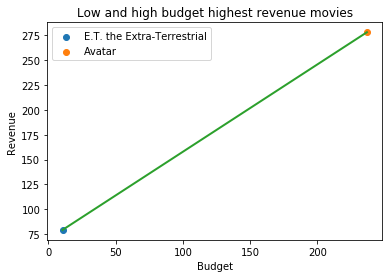

In [129]:
#plot the relation between Low and high budget highest revenue movies
bud=[10.5,237] #used decimal numbers to scale better the visualisation
rev=[79.29,278.15]
plt.scatter([10.5],[79.29],label='E.T. the Extra-Terrestrial'); #plot scatter graph indicating the movies
plt.scatter([237],[278.15],label='Avatar');
plt.plot(bud, rev, 'C2', lw=2); #plot the line between both movies
plt.title('Low and high budget highest revenue movies'); #describing stuffs
plt.xlabel('Budget');
plt.ylabel('Revenue');
plt.legend();

Both famous films but different kind of budget: most probably because of the production year and the genre too. We could analyse from the graph the direct relationship between budget and revenue, underlining the importance of funds to reach good result.

<a id='Question2'></a>
## Question2
Analyse the relationship between overall votes and obtained vote <=> 6

(6.0, 5.974921774342001)

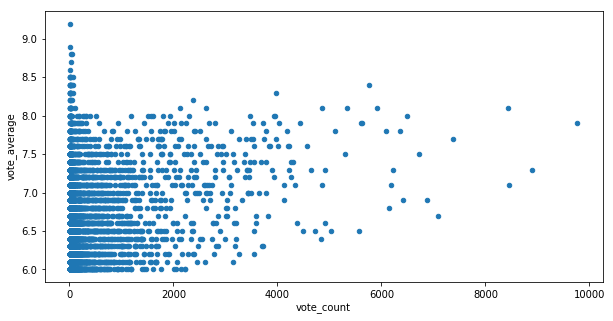

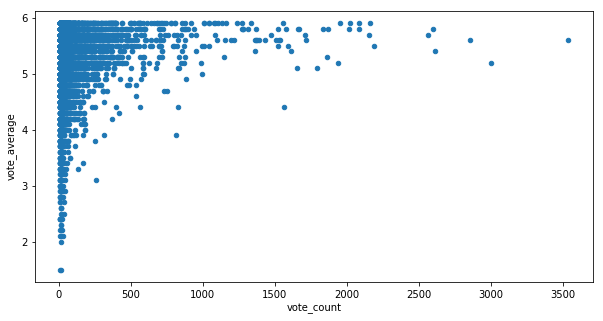

In [132]:
#using pandas query I group the movies which obtained <=> 6 about vote_average, plotting in a different kind of graph (scatter)
df.query('vote_average >= 6').plot(x='vote_count',y='vote_average',kind='scatter',figsize=(10,5)),df.query('vote_average < 6').plot(x='vote_count',y='vote_average',kind='scatter',figsize=(10,5));
df['vote_average'].median(), df['vote_average'].mean()

Checking by scatter graphs we could notice the mostly votes have been around [6,7], in fact if we calculate median and/or average we could confirm it.

<a id='Question3'></a>
## Question3
Sorting by popularity and taking 10 most popular movies sample, analyse the reletionship between runtime and overall votes

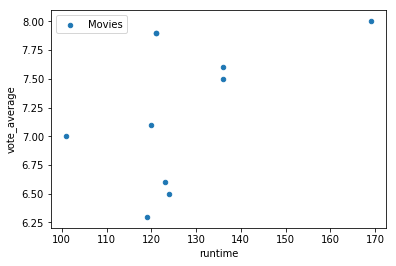

In [223]:
#sorting by popularity, I plot the 10 most popular movies analysing the relationship between runtime and vote_average
df.sort_values(by='popularity', ascending=False).iloc[0:10].plot.scatter(x='runtime',y='vote_average',label='Movies');

As we can analyse from 10 most popular movies sample, there's not a stricly direct relationship between runtime and vote_average and it means people like watch movies prescinding by vote review.

<a id='Question4'></a>
## Question4
Find the budget average usefull to obtain a vote more than 6

In [307]:
df.query('vote_average >= 6').budget.mean() #looking for budget average about >= 6 vote_average movies

16427332.555421688

In [315]:
#using pandas query I'm looking for min and max budget limits
df.query('vote_average >= 6').sort_values(by='budget').min().budget, df.query('vote_average >= 6').sort_values(by='budget').max().budget

(0, 425000000)

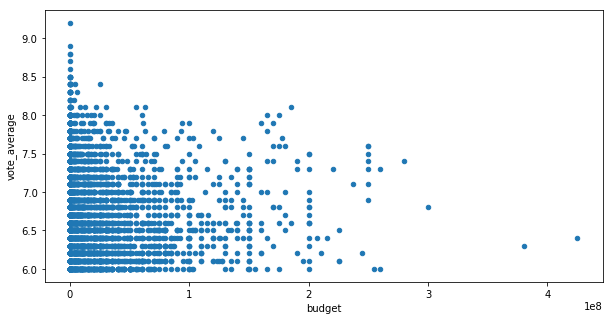

In [302]:
#plot using a scatter graph, the relationship between budget and vote_average, for just >= 6 vote_average movies
df.query('vote_average >= 6').sort_values(by='budget').plot.scatter(x='budget',y='vote_average',figsize=(10,5));

Analysing out ds we could apprend it needs a budget between [10kk:20kk] to get a vote_avarage around 6 (the average budget it's 16427332.555421688, with a minimum and maximum like (0, 425000000))

<a id='Question5'></a>
## Question5
Check the kind of property about highest revenue movie, about low budget movie, about highest ratio vote movie and about most popular movie

In [327]:
df.revenue.max()

2781505847

In [328]:
df.query('revenue == 2781505847') #these are the Avatar property, as highest revenue movie in out ds

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


In [329]:
df.budget.min()

0

In [330]:
df.query('budget == 0') #these are the lowest budget movies property, as highest revenue movie in out ds

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.0,1.839999e+06
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.000000e+00
95,258509,tt2974918,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,http://www.foxmovies.com/movies/alvin-and-the-...,Walt Becker,Fast & furry-ous,...,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.7,2015,0.0,2.150550e+08
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.000000e+00
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.000000e+00


In [386]:
df['vote_ratio']=(df.vote_average/df.vote_count) #determine vote_ratio as vote_average and vote_count ratio
df.sort_values(by='vote_ratio').max()

id                     417859
popularity            32.9858
budget              425000000
revenue            2781505847
original_title       í•˜ìš¸ë§
runtime                   900
release_date           9/9/97
vote_count               9767
vote_average              9.2
release_year             2015
budget_adj           4.25e+08
revenue_adj       2.82712e+09
vote_ratio               0.86
dtype: object

In [387]:
df.query('vote_ratio == 0.86') #the highest vote_ratio movie is so Opeth: In Live Concert At The Royal Albert Hall

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_ratio
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,163,Music,NaN,9/21/10,10,8.6,2010,0.0,0.0,0.86


In [388]:
df.popularity.max()

32.985763

In [390]:
df.query('popularity == 32.985763') #the most popular movie is Jurassic World

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_ratio
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,0.001169
